In [1]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Data

df = pd.read_csv('nm-covid19.csv',parse_dates=['Date'],index_col=['Date'])

In [7]:
df.fillna(0)
df.tail(2)

,Confirmed Cases,Active Cases,New Cases,Recoveries,Deaths
Date,,,,,
2020-04-16,1597,1200,113.0,353,44
2020-04-17,1711,1278,114.0,382,51


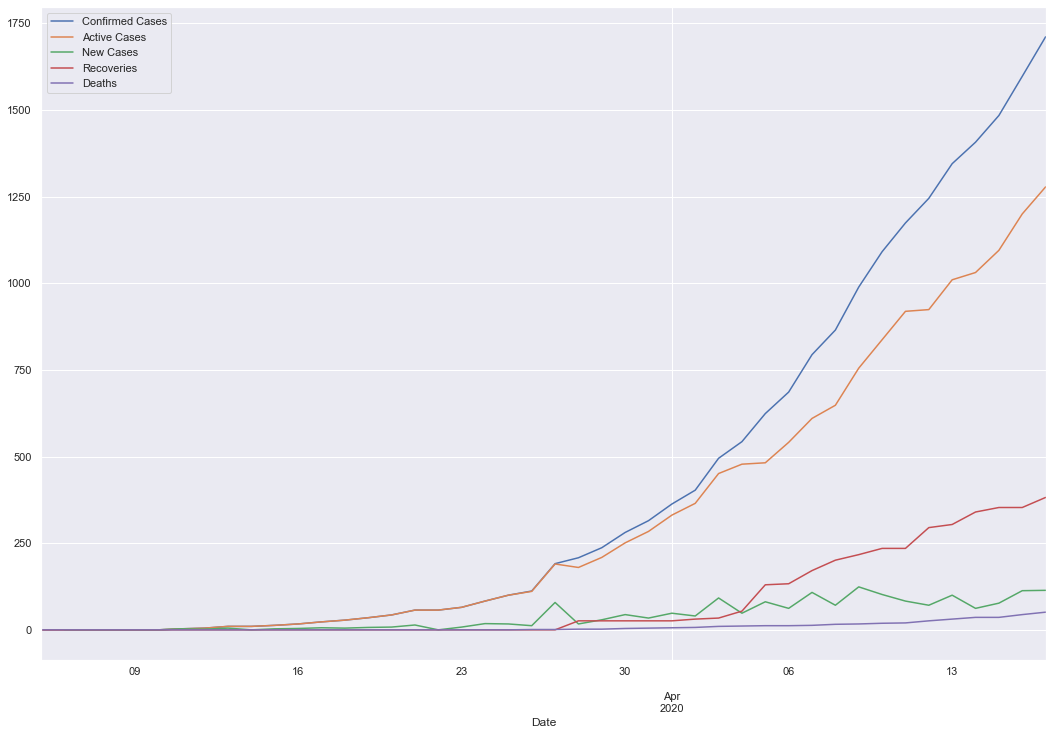

In [8]:
sns.set(style="darkgrid")
df.plot(figsize=(18,12))